# Exercises

## Exercise 1: explore filter parameters
---
In this exercises you will explore how different parameters affect the filtering process.
- Import the data form `data/moving_lfp.pickle` (the file is already on your machine if you run the `download_data()` cell in the main lesson)
- Take a few seconds of the data, and filter them in different frequency bands. Plot the resulting signal.
  Fix the central frequency and play with the width of the band, then try to change the central frequency of the band.
- Change the order of the filter, keeping the frequency band fixed. How does the filtered signal change? How does the computing time change? (You can try to quantify the computing time with the jupyter magic command [`%timeit`](https://docs.python.org/3/library/timeit.html) )
- Comment on what you see

In [6]:
import pickle
import sys
import os
sys.path.append(os.path.abspath("code"))
print(os.getcwd())

import matplotlib.pyplot as plt
import numpy as np

c:\Users\ptrso\OneDrive\Desktop\MasteRU\Quarter3\NRA\Assignments\LFP


In [13]:
# Download the data
# download_data('https://surfdrive.surf.nl/files/index.php/s/9nY01qMimFLez40')

# Load the data
with open('../../neural-data/01-local_field_potential/data/moving_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')
# lfp/1000 is the time in seconds

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


Text(0.5, 1.0, '2 seconds of LFP Signal')

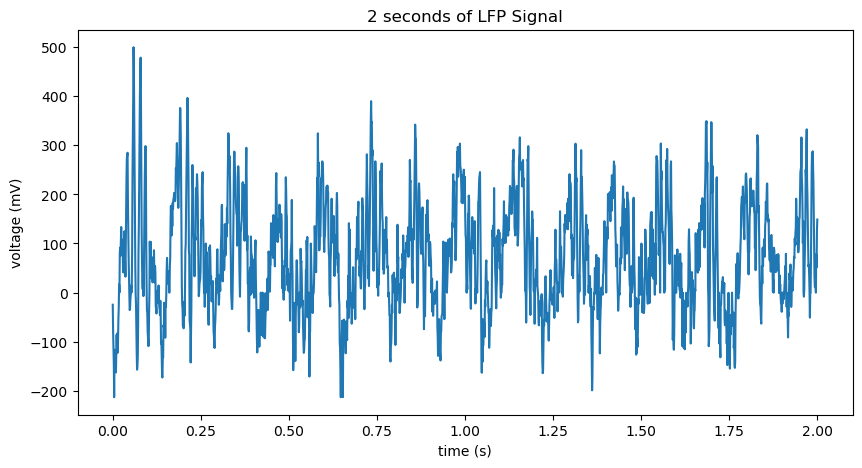

In [8]:
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,2,2000),lfp[:2000]) # 2 seconds = 2000 lfp points
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title("2 seconds of LFP Signal")

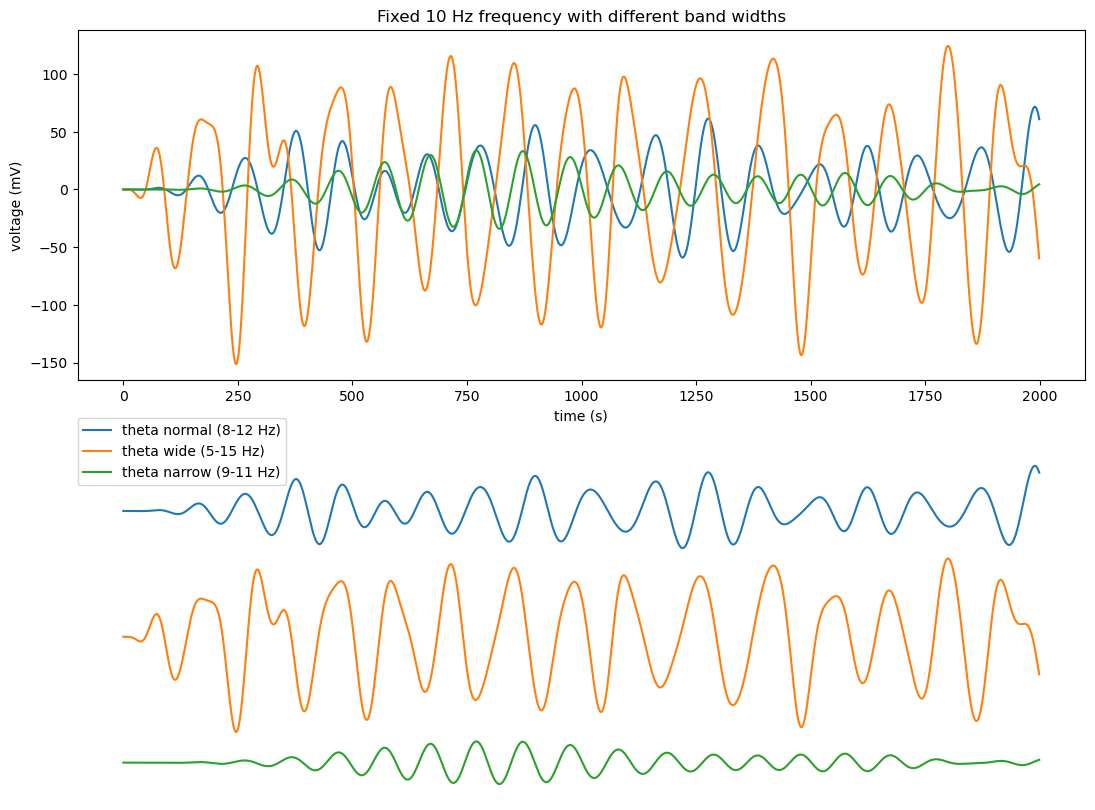

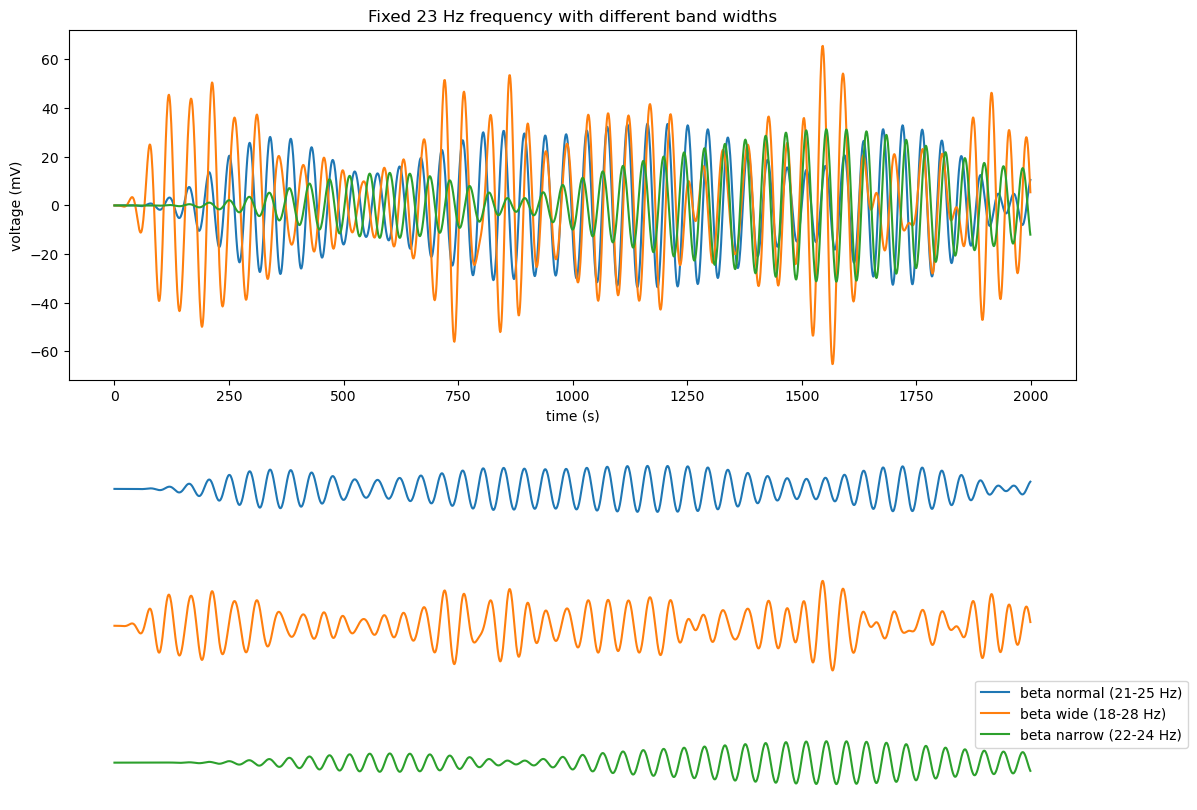

In [69]:
def bandpass_filter(input, low_f, high_f, sampling_rate):
    filter_order = 5
    filter = butter(filter_order,[low_f,high_f],
                    btype='band', 
                    output='sos', 
                    fs=sampling_rate)
                          
    wideband_lfp = sosfilt(filter, input)
    return wideband_lfp

th_lfp_normal = bandpass_filter(lfp,low_f=8,high_f=12, sampling_rate=sampling_rate)
th_lfp_wide = bandpass_filter(lfp,low_f=5,high_f=15, sampling_rate=sampling_rate)
th_lfp_narrow = bandpass_filter(lfp,low_f=9,high_f=11, sampling_rate=sampling_rate)

plot_offset = 200 # to plot the signal on different lines

plt.figure(figsize=(13, 10))

# First subplot
plt.subplot(2, 1, 1)
plt.plot(th_lfp_normal[:2000], label='theta normal (8-12 Hz)')
plt.plot(th_lfp_wide[:2000], label='theta wide (5-15 Hz)')
plt.plot(th_lfp_narrow[:2000], label='theta narrow (9-11 Hz)')
plt.ylabel('voltage (mV)')
plt.xlabel('time (s)')
plt.title("Fixed 10 Hz frequency with different band widths")

# Second subplot
plt.subplot(2, 1, 2)
plt.plot(th_lfp_normal[:2000]+2*plot_offset, label='theta normal (8-12 Hz)')
plt.plot(th_lfp_wide[:2000]+plot_offset, label='theta wide (5-15 Hz)')
plt.plot(th_lfp_narrow[:2000], label='theta narrow (9-11 Hz)')
plt.legend(loc=(0, 0.9))
plt.axis('off')


#---------------------
b_lfp_normal = bandpass_filter(lfp,low_f=21,high_f=25, sampling_rate=sampling_rate)
b_lfp_wide = bandpass_filter(lfp,low_f=18,high_f=28, sampling_rate=sampling_rate)
b_lfp_narrow = bandpass_filter(lfp,low_f=22,high_f=24, sampling_rate=sampling_rate)

plt.figure(figsize=(13, 10))

plt.subplot(2, 1, 1)
plt.plot(b_lfp_normal[:2000], label='beta normal (21-25 Hz)')
plt.plot(b_lfp_wide[:2000], label='beta wide (18-28 Hz)')
plt.plot(b_lfp_narrow[:2000], label='beta narrow (22-24 Hz)')
plt.ylabel('voltage (mV)')
plt.xlabel('time (s)')
plt.title("Fixed 23 Hz frequency with different band widths")

plt.subplot(2, 1, 2)
plt.plot(b_lfp_normal[:2000]+2*plot_offset, label='beta normal (21-25 Hz)')
plt.plot(b_lfp_wide[:2000]+plot_offset, label='beta wide (18-28 Hz)')   
plt.plot(b_lfp_narrow[:2000], label='beta narrow (22-24 Hz)')
plt.axis('off')
plt.legend(loc=(0.9,0.15))

## Exercise 2: wavelet transform with real wavelets
---
In this exercises you will explore the difference between real and complex wavelets in the continous wavelet transform.
- Import the data form `data/moving_lfp.pickle`
- Select a period of a few seconds of the signal and compute the spectrogram. 
  Try the wavelet transform with wavelet `mexh` (mexican hat),`gaus` (gaussian) and `morl` (morlet). These are all real wavelets.
- What differences do you see with respect to the spectrum computed with the complex Morlet tranform ? Comment on why do you think this might be the case.

## Exercise 3: REM sleep detection
---
Mammalian sleep is organized in different phases. [Rapid Eye Movement (REM) sleep](https://en.wikipedia.org/wiki/Rapid_eye_movement_sleep) is a well studied phase, with clear markers that make it detectable from LFP data. One of the most used marker is the ratio (or difference) between the oscillatory power in the theta and delta bands in the hippocampus. During REM sleep, the former dominates, in a pattern that resembles active behaviour.  
In this exercise we will use the tools we learned about to detect and inspect the REM and non-REM (nREM) phases of sleep in data recorded from the hippocampus of a sleeping mouse.

- Import the data form `data/moving_lfp.pickle`
- Compute the instantaneous power in the theta (6-10 Hz) and delta (2-4 Hz) frequency bands, for the whole signal.
- z-score the two power signals (subtract the mean and divide by the standard deviation, you can use `scipy.stats.zscore()`)
- Compute and plot the power difference (`theta_power - delta_power`) for the sleep session.
- Compute the REM (power difference $>0.2$) and nREM (power diffewrence $<0.2$) sleep periods.
- Plot examples of REM vs nREM lfp signals (wideband filtered betw. 1 and 200 Hz to get rid of some of the noise).
- Explore how changing the threshold affects the amount of REM sleep detected.

In [ ]:
# from scipy.fft import fft, fftfreq

# n_samples = len(lfp)
# print(f"Number of samples: {n_samples}")
# # print(lfp[:10], lfp[-10:])
# sample_dt = 1/sampling_rate

# centered_lfp = lfp - np.mean(lfp)

# # FFT
# fft_lfp = fft(centered_lfp)[:n_samples//2]
# freqs = fftfreq(n_samples, sample_dt)[:n_samples//2]

# power = abs(fft_lfp)**2

# plt.figure(figsize = (10,5))
# plt.plot(freqs, power)
# plt.xlim([0,100]) # restrict to 
# plt.axvline(x=8 ,c='r',linestyle='--',label='8 Hz theta')
# plt.axvline(x=50 ,c='grey',linestyle='--',label='50 Hz electrical noise')
# plt.legend()
# plt.title("Power Spectrum")
